In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pickle
import torch
import dill
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from pyloric import summary_stats, simulate, create_prior
from paper.pyloric_utils import compare_voltage_low_and_high_energy_trace
from sbi.analysis import pairplot, marginal_plot
from sbi.utils.posterior_ensemble import NeuralPosteriorEnsemble
from sbi.utils.sbiutils import ImproperEmpirical

# Panel A

In [3]:
xo = torch.as_tensor(
    [
        1.17085859e03,
        2.06036434e02,
        2.14307031e02,
        4.12842187e02,
        1.75970382e-01,
        1.83034085e-01,
        3.52597820e-01,
        4.11600328e-01,
        6.30544893e-01,
        4.81925781e02,
        2.56353125e02,
        2.75164844e02,
        4.20460938e01,
        2.35011166e-01,
        3.59104797e-02,
        2.5,
        2.5,
        2.5,
    ]
)
prior = create_prior().numerical_prior
lower = prior.support.base_constraint.lower_bound
upper = prior.support.base_constraint.upper_bound
limits = torch.stack([lower, upper]).T
p = create_prior()
names = p.sample((1,)).columns
unconstrained_prior = ImproperEmpirical(torch.rand(100, 31), torch.ones(100))

In [34]:
with open("../../../l5pc/results/p31_4/multiround/2022_05_14__23_49_35__multirun/0/inference_r13.pkl", "rb") as handle:
    inference_constrained_r13 = pickle.load(handle)
with open("../../../l5pc/results/p31_4/multiround/2022_05_14__00_13_47__multirun/0/inference_r5.pkl", "rb") as handle:
    inference_constrained_r5 = pickle.load(handle)

In [35]:
posterior_c_r13 = inference_constrained_r13[0].build_posterior().set_default_x(xo)
posterior_c_r5 = inference_constrained_r5[0].build_posterior().set_default_x(xo)

In [82]:
_ = torch.manual_seed(1)
samples_c_r13 = posterior_c_r13.sample((10000,))

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

In [83]:
time_vec = np.arange(0, 11000, 0.025)

# Panel A

In [84]:
_ = torch.manual_seed(0)
normal_samples = pd.DataFrame(samples_c_r13.numpy(), columns=names)
traces = [simulate(normal_samples.loc[i]) for i in range(2)]

Showing :   3.0 seconds
Scalebar indicates:  50mV


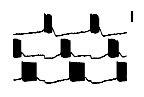

Showing :   3.0 seconds
Scalebar indicates:  50mV


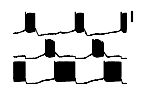

In [85]:
for i in range(2):
    with mpl.rc_context(fname="../../.matplotlibrc"):
        compare_voltage_low_and_high_energy_trace(
            traces[i],
            time_vec,
            figsize=(1.6, 1.0),
        )
        plt.savefig(f"../svg/panel_appendix1_a{i}.svg", transparent=True)
        plt.show()

In [86]:
far_out_condition = samples_c_r13[:, 4] > 14.9999
far_out_samples = samples_c_r13[far_out_condition]
far_out_samples_pd = pd.DataFrame(far_out_samples.numpy(), columns=names)

In [87]:
_ = torch.manual_seed(0)
traces = [simulate(far_out_samples_pd.loc[i]) for i in range(2)]

Showing :   3.0 seconds
Scalebar indicates:  50mV


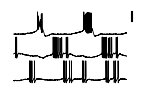

Showing :   3.0 seconds
Scalebar indicates:  50mV


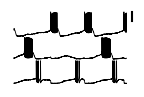

In [88]:
for i in range(2):
    with mpl.rc_context(fname="../../.matplotlibrc"):
        compare_voltage_low_and_high_energy_trace(
            traces[i],
            time_vec,
            figsize=(1.6, 1.0),
        )
        plt.savefig(f"../svg/panel_appendix1_b{i}.svg", transparent=True)
        plt.show()

# Panel E

In [89]:
with open("/home/michael/Documents/tsnpe_collection/l5pc/results/p31_4/multiround/2022_05_17__01_40_01__multirun/0/inference_r13.pkl", "rb") as handle:
    inference_tsnpe_r13 = pickle.load(handle)

In [90]:
posterior_tsnpe_r13 = inference_tsnpe_r13[0].build_posterior().set_default_x(xo)

In [91]:
_ = torch.manual_seed(2)
samples_tsnpe_r13 = posterior_tsnpe_r13.sample((10000,))

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

In [92]:
sorted_params_pd = pd.DataFrame(samples_tsnpe_r13, columns=names)

In [93]:
_ = torch.manual_seed(0)
all_out_targets = []
summstats = []
for counter in range(4):
    out_target = simulate(sorted_params_pd.loc[counter], seed=0)
    summstats.append(summary_stats(out_target))
    all_out_targets.append(out_target)

In [94]:
time_vec = np.arange(0, 11000, 0.025)

Showing :   3.0 seconds
Scalebar indicates:  50mV


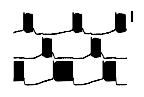

Showing :   3.0 seconds
Scalebar indicates:  50mV


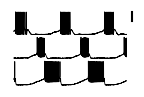

Showing :   3.0 seconds
Scalebar indicates:  50mV


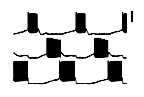

Showing :   3.0 seconds
Scalebar indicates:  50mV


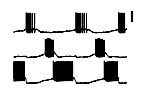

In [95]:
for i in range(4):
    with mpl.rc_context(fname="../../.matplotlibrc"):
        compare_voltage_low_and_high_energy_trace(
            all_out_targets[i],
            time_vec,
            figsize=(1.6, 1.0),
        )
        plt.savefig(f"../svg/panel_appendix1_c{i}.svg", transparent=True)
        plt.show()

## Assemble figure

In [96]:
import time
import IPython.display as IPd

def svg(img):
    IPd.display(IPd.HTML('<img src="{}" / >'.format(img, time.time())))

In [97]:
from svgutils.compose import *

# > Inkscape pixel is 1/90 of an inch, other software usually uses 1/72.
# > http://www.inkscapeforum.com/viewtopic.php?f=6&t=5964
svg_scale = 1.25  # set this to 1.25 for Inkscape, 1.0 otherwise
factor_svg=5.5

# Panel letters in Helvetica Neue, 12pt, Medium
kwargs_text = {'size': '12pt', 'font': 'Arial', 'weight': '800'}
kwargs_consistent = {'size': '10pt', 'font': 'Arial', 'weight': '500', 'color': '#AF99EF'}
kwargs_consistent1 = {'size': '10pt', 'font': 'Arial', 'weight': '500', 'color': '#9E7DD5'}
kwargs_inconsistent = {'size': '10pt', 'font': 'Arial', 'weight': '500', 'color': '#AF99EF'}
kwargs_text8pt = {'size': '7.7pt', 'font': 'Arial'}

sizefactor = 1.0

f = Figure("15.7cm", "2.6cm",
    Panel(
          SVG("../svg/panel_appendix1_a0.svg").scale(svg_scale),
          Text("a", -5, -2, **kwargs_text),
          Text("APT posterior predictives", 75, -2, **kwargs_text8pt),
    ).move(5, 15),
    Panel(
          SVG("../svg/panel_appendix1_a1.svg").scale(svg_scale),
    ).move(135, 15),
    Panel(
          SVG("../svg/panel_appendix1_b0.svg").scale(svg_scale),
          Text("b", -5, -2, **kwargs_text),
          Text("APT posterior predictives from 'leaking' region", 25, -2, **kwargs_text8pt),
    ).move(295, 15),
    Panel(
          SVG("../svg/panel_appendix1_b1.svg").scale(svg_scale),
    ).move(425, 15),    
)

!mkdir -p fig
f.save("../fig/fig7_appendix1.svg")
svg('../fig/fig7_appendix1.svg')

In [98]:
from svgutils.compose import *

# > Inkscape pixel is 1/90 of an inch, other software usually uses 1/72.
# > http://www.inkscapeforum.com/viewtopic.php?f=6&t=5964
svg_scale = 1.25  # set this to 1.25 for Inkscape, 1.0 otherwise
factor_svg=5.5

# Panel letters in Helvetica Neue, 12pt, Medium
kwargs_text = {'size': '12pt', 'font': 'Arial', 'weight': '800'}
kwargs_consistent = {'size': '10pt', 'font': 'Arial', 'weight': '500', 'color': '#AF99EF'}
kwargs_consistent1 = {'size': '10pt', 'font': 'Arial', 'weight': '500', 'color': '#9E7DD5'}
kwargs_inconsistent = {'size': '10pt', 'font': 'Arial', 'weight': '500', 'color': '#AF99EF'}
kwargs_text8pt = {'size': '7.7pt', 'font': 'Arial'}

sizefactor = 1.0

f = Figure("15.7cm", "2.3cm",
    Panel(
          SVG("../svg/panel_appendix1_c0.svg").scale(svg_scale),
          Text("TSNPE posterior predictives", 205, 1, **kwargs_text8pt),
    ).move(5, 8),
    Panel(
          SVG("../svg/panel_appendix1_c1.svg").scale(svg_scale),
    ).move(140, 8),
    Panel(
          SVG("../svg/panel_appendix1_c2.svg").scale(svg_scale),
    ).move(275, 8),
    Panel(
          SVG("../svg/panel_appendix1_c3.svg").scale(svg_scale),
    ).move(410, 8),    
)

!mkdir -p fig
f.save("../fig/fig7_appendix2.svg")
svg('../fig/fig7_appendix2.svg')